# Universidad del Valle de Guatemala
# (CC3084) Data Science
# Proyecto - Análisis Exploratorio

Miembros del equipo de trabajo:
- Pedro Pablo Arriola Jiménez (20188)
- Oscar Fernando López Barrios (20679)
- Marco Pablo Orozco Saravia (20857)
- Yong Bum Park (20117)
- Santiago Taracena Puga (20017)

## Análisis exploratorio

En esta etapa inicial del proyecto, este archivo `main.ipynb` se centra exclusivamente en el análisis exploratorio de los datos proporcionados. Se han realizado operaciones de limpieza y preprocesamiento básicas para asegurar la calidad de los datos y facilitar su uso en etapas posteriores del proyecto. El desarrollo y entrenamiento de modelos de aprendizaje automático, así como la implementación de soluciones, se abordarán en secciones posteriores de este proyecto.

El primer procedimiento que se realizó fue importar las librerías que en principio serán necesarias con el objetivo de la realización del análisis exploratorio del proyecto. Algunas de estas librerías son las clásicas pandas y numpy, sumamente importantes para el desarrollo de cualquier proyecto que tenga qué ver con el análisis de datos y, en muchos casos, el aprendizaje profundo como el que se llevará a cabo para el desarrollo de la solución de este proyecto.

In [98]:
# Proceso para importar pandas y numpy.
import pandas as pd
import numpy as np

Posteriormente se observó el contenido dentro del archivo `sample_submission.csv`. Pese a que los datos principales a analizar son las imágenes que se encuentran en la capreta de entrenamiento, debemos conocer el contenido de los .csv brindados para ligar su información a las imágenes que se van a utilizar.

In [99]:
# Lectura del archivo sample_submission.csv.
sample_submission_data = pd.read_csv("./data/sample_submission.csv")
sample_submission_data.head()

,id,height,width,prediction_string
0,72e40acccadf,512,512,0 1.0 eNoLTDAwyrM3yI/PMwcAE94DZA==


Luego de la lectura de este archivo, podemos leer el siguiente que se encuentra en la parte exterior de la carpeta de data que nos proporcionó Kaggle. Este archivo es `tile_meta.csv`, el cual también contiene información interesante.

In [100]:
# Lectura de los primeros datos del archivo tile_meta.csv.
tile_meta_data = pd.read_csv("./data/tile_meta.csv")
tile_meta_data.set_index("id", inplace=True)
tile_meta_data.head()

,source_wsi,dataset,i,j
id,,,,
0006ff2aa7cd,2,2,16896,16420
000e79e206b7,6,3,10240,29184
00168d1b7522,2,2,14848,14884
00176a88fdb0,7,3,14848,25088
0033bbc76b6b,1,1,10240,43008


In [101]:
# Últimos datos presentes en el archivo tile_meta.csv.
tile_meta_data.tail()

,source_wsi,dataset,i,j
id,,,,
ffd37b5c6598,13,3,13824,21504
ffd3d193c71e,3,2,7680,16896
ffd77e2517af,13,3,15872,28160
ffe3cbb81f72,10,3,15456,23000
ffe40e3bc324,9,3,13824,19456


In [102]:
# Tupla con la forma del archivo.
tile_meta_data.shape

(7033, 4)

In [103]:
# Descripción de los datos presentes.
tile_meta_data.describe()

,source_wsi,dataset,i,j
count,7033.000000,7033.000000,7033.000000,7033.000000
mean,8.205744,2.707806,14296.542585,23227.014930
std,4.004251,0.571724,5946.054578,10644.032931
min,1.000000,1.000000,1536.000000,2560.000000
25%,6.000000,3.000000,9728.000000,15265.000000
50%,9.000000,3.000000,13824.000000,22528.000000
75%,12.000000,3.000000,18944.000000,29656.000000
max,14.000000,3.000000,30208.000000,52753.000000


Finalmente, el último archivo .csv a observar el contenido es `wsi_meta.csv`.

In [104]:
# Lectura del contenido de wsi_meta.csv.
wsi_meta_data = pd.read_csv("./data/wsi_meta.csv")
wsi_meta_data.set_index("source_wsi", inplace=True)
# Mapeo para la columna "sex"
sex_mapping = {"M": 0, "F": 1}
wsi_meta_data["sex"] = wsi_meta_data["sex"].map(sex_mapping)

# Mapeo para la columna "race"
race_mapping = {"B": 0, "W": 1}
wsi_meta_data["race"] = wsi_meta_data["race"].map(race_mapping)
wsi_meta_data.head()

,age,sex,race,height,weight,bmi
source_wsi,,,,,,
1,58,1,1,160.0,59.0,23.0
2,56,1,1,175.2,139.6,45.5
3,73,1,1,162.3,87.5,33.2
4,53,0,0,166.0,73.0,26.5


In [105]:
# Últimos datos del archivo leído.
wsi_meta_data.tail()

,age,sex,race,height,weight,bmi
source_wsi,,,,,,
1,58,1,1,160.0,59.0,23.0
2,56,1,1,175.2,139.6,45.5
3,73,1,1,162.3,87.5,33.2
4,53,0,0,166.0,73.0,26.5


In [106]:
# Tupla con la forma del archivo.
wsi_meta_data.shape

(4, 6)

In [107]:
from PIL import Image

tiff_image = Image.open("./data/test/72e40acccadf.tif")
tiff_image.show()
tiff_image.close()

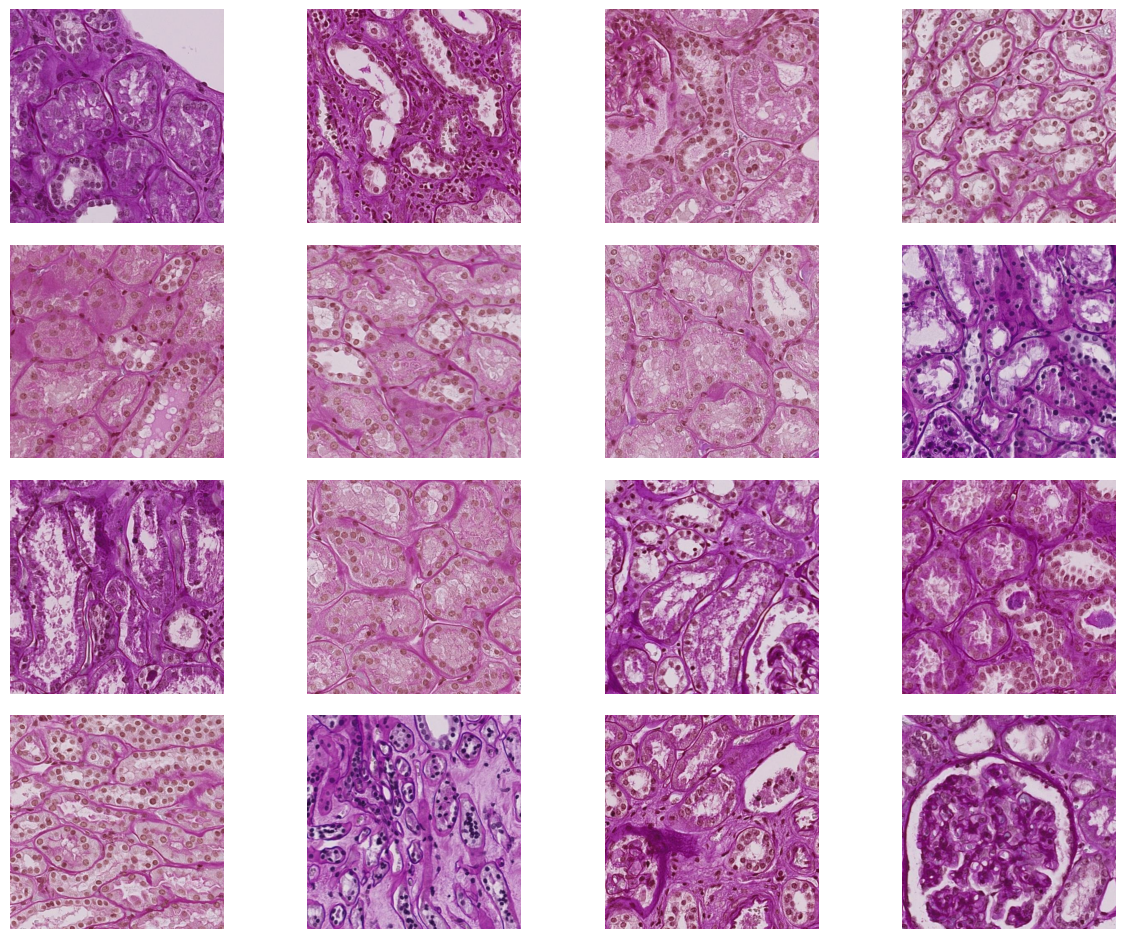

In [108]:
import os
import random
import matplotlib.pyplot as plt

train_path = "./data/train"

train_tiff_images = []

for file in os.listdir(train_path):
    if (file.endswith(".tif")):
        file_path = os.path.join(train_path, file)
        tiff_image = Image.open(file_path)
        train_tiff_images.append(tiff_image)

images_to_show = [random.choice(train_tiff_images) for _ in range(16)]

# Configura el número de columnas en el grid y el tamaño de la figura
num_columnas = 4  # Puedes ajustar este valor según tus preferencias
fig = plt.figure(figsize=(15, 15))

# Muestra las imágenes en un grid
for i, imagen in enumerate(images_to_show, 1):
    ax = fig.add_subplot(len(images_to_show)//num_columnas + 1, num_columnas, i)
    ax.imshow(imagen)
    ax.axis("off")

# Ajusta el espacio entre las imágenes y muestra el grid
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

In [109]:
tile_meta_data.describe()

,source_wsi,dataset,i,j
count,7033.000000,7033.000000,7033.000000,7033.000000
mean,8.205744,2.707806,14296.542585,23227.014930
std,4.004251,0.571724,5946.054578,10644.032931
min,1.000000,1.000000,1536.000000,2560.000000
25%,6.000000,3.000000,9728.000000,15265.000000
50%,9.000000,3.000000,13824.000000,22528.000000
75%,12.000000,3.000000,18944.000000,29656.000000
max,14.000000,3.000000,30208.000000,52753.000000


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'race'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'bmi'}>]], dtype=object)

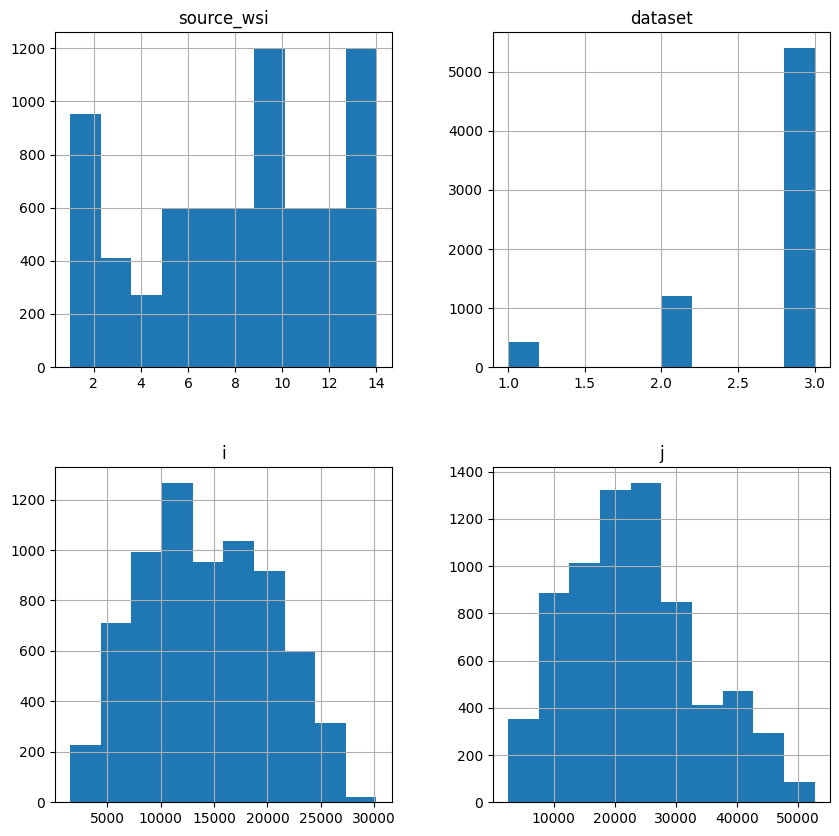

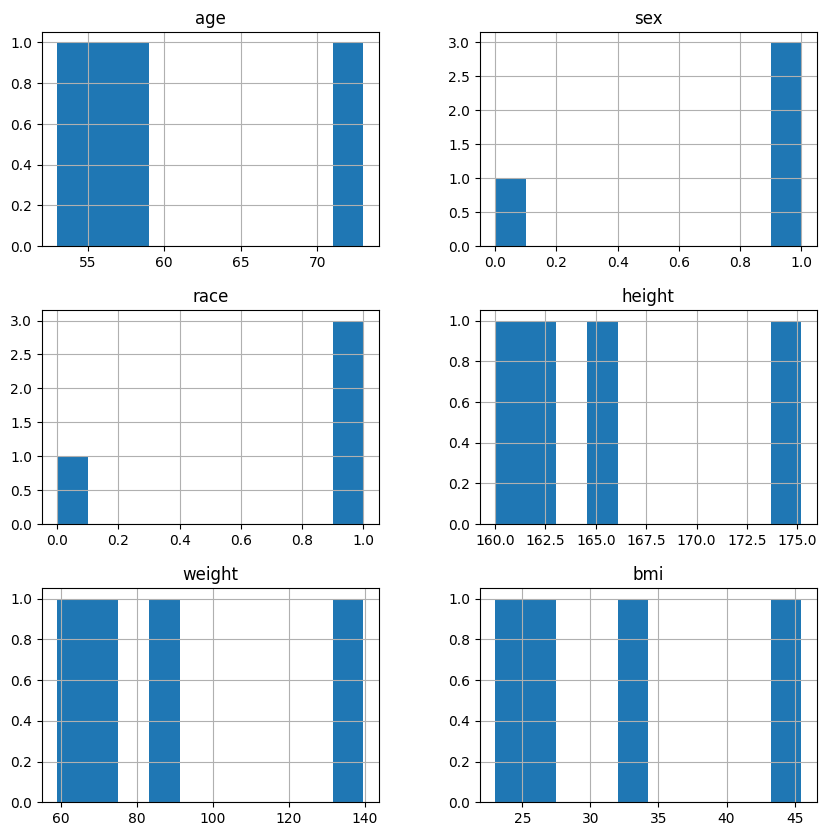

In [110]:
import seaborn as sns
from scipy import stats

# Histogramas
tile_meta_data.hist(figsize=(10,10))
wsi_meta_data.hist(figsize=(10,10))


<Axes: >

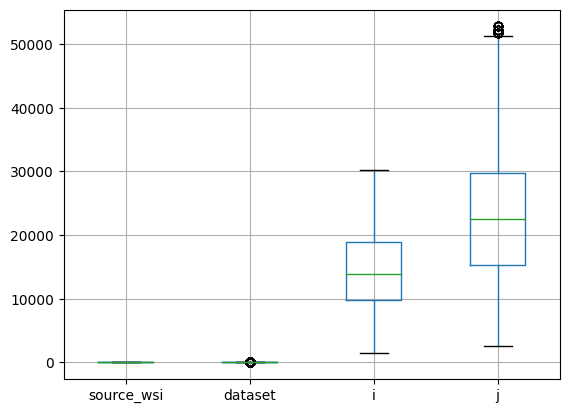

In [111]:
# Diagramas de cajas
tile_meta_data.boxplot()

<Axes: >

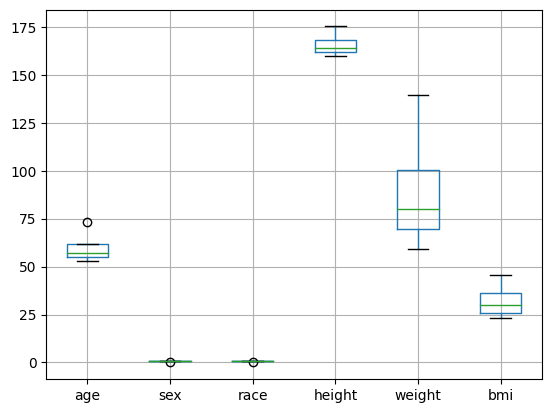

In [112]:
wsi_meta_data.boxplot()

c:\Users\PARK JONGHYUN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PARK JONGHYUN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='i', ylabel='j'>

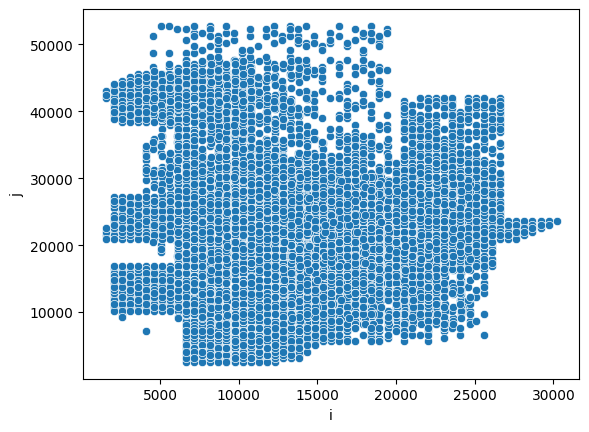

In [113]:
# Gráficos de dispersión
sns.scatterplot(x='i', y='j', data=tile_meta_data)

<Axes: >

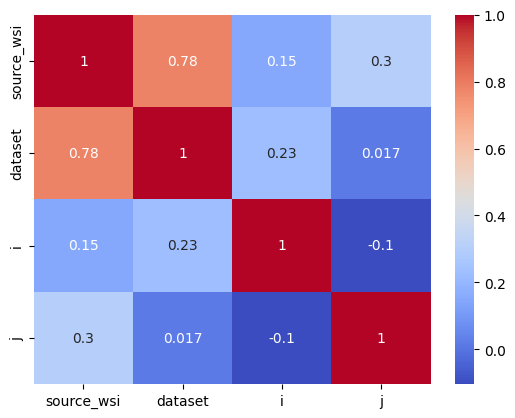

In [114]:
# Correlación
correlation = tile_meta_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

<Axes: >

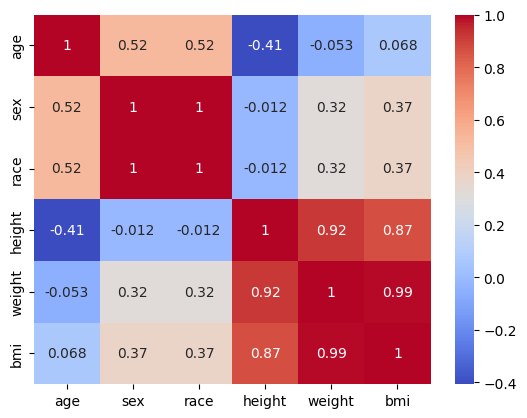

In [115]:
correlation = wsi_meta_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')


In [119]:
# Tratar los outliers usando el método del rango intercuartil
Q1 = wsi_meta_data.quantile(0.25)
Q3 = wsi_meta_data.quantile(0.75)
IQR = Q3 - Q1

wsi_meta_data = wsi_meta_data[~((wsi_meta_data < (Q1 - 1.5 * IQR)) | (wsi_meta_data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [120]:
Q1 = tile_meta_data.quantile(0.25)
Q3 = tile_meta_data.quantile(0.75)
IQR = Q3 - Q1

tile_meta_data = tile_meta_data[~((tile_meta_data < (Q1 - 1.5 * IQR)) | (tile_meta_data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [121]:
# Contar valores faltantes
print(wsi_meta_data.isnull().sum())

age       0
sex       0
race      0
height    0
weight    0
bmi       0
dtype: int64


In [122]:
# Contar valores faltantes
print(tile_meta_data.isnull().sum())

source_wsi    0
dataset       0
i             0
j             0
dtype: int64


In [138]:
print(pd.crosstab(index=tile_meta_data['dataset'], columns='count'))


col_0    count
dataset       
3         5372
